# Imports

In [4]:
%reload_ext autoreload
%autoreload 2

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
from helpers import *

# Dataset Description

The dataset is available at Zenodo [doi:10.5281/zenodo.3241922](https://doi.org/10.5281/zenodo.3241922). The associated paper that discuss the dataset is:

> Fabiyi, SD, Vu, H, Tachtatzis, C, Murray, P, Harle, D, Dao, TK, Andonovic, I, Ren, J & Marshall, S 2020, 'Varietal classification of rice seeds using RGB and hyperspectral images', IEEE Access, vol. 8, pp. 22493-22505, [10.1109/ACCESS.2020.2969847](https://doi.org/10.1109/ACCESS.2020.2969847).


The following is the description of the dataset:

The dataset contains 90 rice seed species and 96 kernels per species resulting in 8,640 rice seed kernels in total. The dataset was collected in 2017 using the following two imaging systems:

1. Visible - Near Infrared (VIS/NIR) Hyperspectral Imaging Device System (~385nm - ~1000nm) consisting of a Specim V10E Imaging Spectrograph and Hamamatsu ORCA-05G CCD camera.
2. RGB - Fujifilm X-M1 with a 35mm/F2.0, ISO 400.

For each species, 96 kernels have been captured in two imaging bundles with 48 kernels in each bundle. For each imaging bundle, the 48 kernels were carefully positioned on a sheet of white paper and arranged in an 8x6 matrix. This rice seed matrix was then positioned on a translational stage and imaged using the HSI and RGB cameras described above.

The following three files result from a single acquisition:

`.hdr`: The HSI ENVI header file (More information on the ENVI format can be found at the [nv5geospatialsoftware](https://www.nv5geospatialsoftware.com/docs/ENVIHeaderFiles.html) documentation.
`.raw`: The HSI datacube data.
`.jpg`: The RGB image.

The filename convention used is the (short) species name followed by a dash, followed by the bundle number (i.e. 1 or 2), followed by the filename suffix. For instance, the data for the `BC15` rice seed variety are contained in the following 6 files:

- `BC15-01.hdr`
- `BC15-01.raw`
- `BC15-01.jpg`
- `BC15-02.hdr`
- `BC15-02.raw`
- `BC15-02.jpg`

The data were captured in 9 batches across multiple days. All the data from the same batch are contained in a dedicated folder. For instance the folder `Data-VIS-20170111-2-room-light-off` indicates that the data are in the VIS/NIR range, captured on the 11th of January 2017 and this was the second batch for that day with the room lights off. Two halogen bulbs were used for illumination and these were accurately positioned to provide balanced lighting across the scene. To ensure stability, the halogen bulbs were switched on and allowed to reach constant operating temperature before the data were acquired in a dark room to minimise any other sources of illumination variance.

For the purposes of calibration each HSI image contains in the scene a 100% reflective Spectralon tile which is a highly reflective Lambertian scatter. For the dark reference, each folder contains an HSI image with the lens-cap covering the camera. The dark reference can be founds in each folder under the filename `black.hdr`/`black.raw`.

A full index of the data for each species is provided in the index.csv file. The file contains the following columns:

- Species Full Name: The full species name (as used in filenames).
- Species Short Name: A shorthand of the species name.
- Bundle Number: Imaging Bundle Number (each bundle contains 48 kernels) every species has 2 bundles.
- Folder: The name of the folder containing the data (as described above where each folder contains a batch of images captured in a single imaging session).
- File Name: The stem of the filename. Note: that there are 3 suffixes for each stem (.hdr, .raw, .jpg)

The HSI system was used to capture 256 wavelengths in this experiment and the exact wavelengths corresponding to the data provided are included in the file wavelengths.csv.

Both camera systems were fixed on a rigid frame for the duration of the experiments. To permit possible registration between the two cameras, a chessboard pattern has been imaged and the acquired files are also contained in the folder chessboard.

**Note:** The bundle `01` for the species `NDC1` was originally acquired during the batch `Data-VIS-20170111-2-room-light-off`. However, the file was corrupted and hence, the acquisition was repeated during the batch `Data-VIS-20170203-1-room-light-off`. As a result, the `NDC1-01` files are in the `Data-VIS-20170203-1-room-light-off` folder.

# Visualising one HSI Image

Firstly we need to load the `index.csv` which provides a list of all the species, the bundle number and the folders that the images are located.

The `DATA_DIR` variable is defined within `helpers.py`; change it if needed.

The `HSIDataSetDataFrame` extends a traditional Pandas DataFrame to offer convenience access to the data. To construct a `HSIDataSetDataFrame` you just pass to the constructor the DataFrame in the format of `index.csv`. For example:

In [9]:
df = HSIDataSetDataFrame(pd.read_csv(DATA_DIR / "index.csv"))

The `HSIDataSetDataFrame` offers a property `images` which accepts an indexing and return an `ImageWrapper` object for every row in the DataFrame. For example to access the image of the 10th row.

In [10]:
df.images[10]

The `ImageWrapper` offers the following properties:
- `hsi`: returns a `spectral.io.bilfile.BilFile` HSI image, including metadata
- `hsi_as_array`: returns the HSI image as a numpy array
- `hsi_calibrated`: returns the HSI with black and white calibration
- `black_background`: returns the black background `spectral.io.bilfile.BilFile` HSI image
- `black_background_as_array`: returns the black background image as a numpy array
- `rgb`: returns the RGB image
- `white_reference`: return the white reference. The reference is computed for every column in the image (as this is a push broom camera) for every wavelength
- `black_reference`: return the black reference. The reference is computed for every column in the image (as this is a push broom camera) for every wavelength

The calibration is done $$I_{\text{norm}} = \frac{I - I_{\text{dark}}}{I_{\text{white}} - I_{\text{dark}}}$$

The black reference is in each batch folder names `black.hdr`. The white reference is captured on every image and it is assumed to occupy rows 625 to 675. Let's do a visualisation of an image to display the location of the spectralon tile. Let's visualise wavelength at index 115 of the 13 image in the dataset.

White reference is take from the spectralon tile rows: 625 to 675


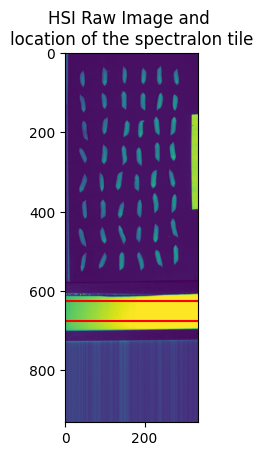

In [12]:
img_num = 13
channel_num = 115
plt.imshow(df.images[img_num].hsi[:, :, channel_num])
plt.title("HSI Raw Image and \nlocation of the spectralon tile")
# draw a red line on row 625 and 675 to show the region of spectralon tile
first, second = df.images[img_num].white_rows
plt.axhline(first, color="red")
plt.axhline(second, color="red")
print(f"White reference is take from the spectralon tile rows: {first} to {second}")

Let's see the raw HSI, calibrated HSI and RGB images for acquisition 13 and wavelength 115:

In [ ]:
# add figure with 2 subplots
fig, axs = plt.subplots(1, 2)
plt.subplot(1, 2, 1)
plt.imshow(df.images[img_num].hsi[:, :, channel_num])
plt.title("Raw HSI")

plt.subplot(1, 2, 2)
plt.imshow(df.images[img_num].hsi_calibrated[:, :, channel_num])
plt.title("Calibrated HSI")


plt.figure()
plt.imshow(df.images[img_num].rgb)
plt.title("RGB Image")


In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(df.images[img_num].hsi_calibrated[:, :, channel_num])
plt.title("Calibrated HSI")

# put a star mark on location
row, col = 400, 95
plt.axhline(row, color="red")
plt.axvline(col, color="red")
plt.scatter(
    col, row, marker="*", color="red", s=100
)  # note coordinates is swapped on images (y, x)

plt.figure()
plt.plot(df.images[img_num].wavelengths, df.images[img_num].hsi_calibrated[row, col, :])
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.title(f"Reflectance Spectrum at location ({row},{col})")
plt.grid(True)
plt.show()